# Lab 7- Data Analysis

In this lab, you download and begin to look at a particle physics dataset. You must download the dataset by March 17th. Exercises 1-4 are to be completed by March 21th. The remaider of the lab is due March 29th. Before leaving lab today, I suggest everyone downloads the dataset.

## Exercise 1: Reading

### HiggsML
In 2014, some of my colleagues from the ATLAS experiment put together a Higgs Machine Learning Challenge, which was hosted on [Kaggle](https://www.kaggle.com). Please read sections 1 and 3 (skip/skim 2) of [The HiggsML Technical Documentation](https://higgsml.lal.in2p3.fr/files/2014/04/documentation_v1.8.pdf). 

Kaggle is a platform for data science competitions, with cash awards for winners. Kaggle currently hosts over 50,000 public datasets and associated competitions. Later in the course we will look at a variety of problems hosted on Kaggle and similar platforms. 

### SUSY Dataset

For the next few labs we will use datasets used in the [first paper on Deep Learning in High Energy physics](https://arxiv.org/pdf/1402.4735.pdf). Please read up to the "Deep Learning" section (end of page 5). This paper demonstrates that Deep Neural Networks can learn from raw data the features that are typically used by physicists for searches for exotics particles. The authors provide the data they used for this paper. They considered two benchmark scenarios: Higgs and SUSY.

## Exercise 2: Download SUSY Dataset

The information about the dataset can be found at the [UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/index.php). We'll start with the [SUSY Dataset](https://archive.ics.uci.edu/ml/datasets/SUSY). 

### Download
In a terminal, download the data directly from the source and then decompress it. For example:

* To download:
    * On Mac OS: 
    `curl http://archive.ics.uci.edu/ml/machine-learning-databases/00279/SUSY.csv.gz > SUSY.csv.gz`

    * In linux:
    `wget http://archive.ics.uci.edu/ml/machine-learning-databases/00279/SUSY.csv.gz`

* To uncompress:
`gunzip SUSY.csv.gz`

In [1]:
!curl http://archive.ics.uci.edu/ml/machine-learning-databases/00279/SUSY.csv.gz > SUSY.csv.gz


  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  879M    0  879M    0     0  2810k      0 --:--:--  0:05:20 --:--:-- 1528k:02:12 --:--:-- 3059k


In [1]:
!gunzip SUSY.csv.gz

gzip: SUSY.csv.gz: No such file or directory


In [2]:
ls -lh

total 2.5G
-rw-r--r-- 1 sirjana sirjana 4.9M Mar 31 19:31 Lab.7.ipynb
-rw-r--r-- 1 sirjana sirjana 5.9M Mar 22 03:48 Lab.7.pdf
-rw-r--r-- 1 sirjana sirjana 228M Mar 31 19:29 SUSY-small.csv
-rw-r--r-- 1 sirjana sirjana 2.3G Mar 29 18:43 SUSY.csv


The data is provided as a comma separated file.

In [92]:
filename="SUSY.csv"
# print out the first 5 lines using unix head command
!head -5  "SUSY.csv"

0.000000000000000000e+00,9.728614687919616699e-01,6.538545489311218262e-01,1.176224589347839355e+00,1.157156467437744141e+00,-1.739873170852661133e+00,-8.743090629577636719e-01,5.677649974822998047e-01,-1.750000417232513428e-01,8.100607395172119141e-01,-2.525521218776702881e-01,1.921887040138244629e+00,8.896374106407165527e-01,4.107718467712402344e-01,1.145620822906494141e+00,1.932632088661193848e+00,9.944640994071960449e-01,1.367815494537353516e+00,4.071449860930442810e-02
1.000000000000000000e+00,1.667973041534423828e+00,6.419061869382858276e-02,-1.225171446800231934e+00,5.061022043228149414e-01,-3.389389812946319580e-01,1.672542810440063477e+00,3.475464344024658203e+00,-1.219136357307434082e+00,1.295456290245056152e-02,3.775173664093017578e+00,1.045977115631103516e+00,5.680512785911560059e-01,4.819284379482269287e-01,0.000000000000000000e+00,4.484102725982666016e-01,2.053557634353637695e-01,1.321893453598022461e+00,3.775840103626251221e-01
1.000000000000000000e+00,4.4483992457389831

## Reducing the dataset

This is a rather large dataset. If you have trouble loading it, we can easily make a new file with less data.

Here we look at the size of the data

In [93]:
!ls -lh

total 2.5G
-rw-r--r-- 1 sirjana sirjana 5.9M Mar 22 03:48 Lab.7.pdf
-rw-r--r-- 1 sirjana sirjana 3.3M Apr 30 12:08 Lab.7.solution.ipynb
-rw-r--r-- 1 sirjana sirjana 228M Apr  1 20:39 SUSY-small.csv
-rw-r--r-- 1 sirjana sirjana 2.3G Mar 29 18:43 SUSY.csv
-rw-r--r-- 1 sirjana sirjana 104K Apr 30 10:58 figure5_l2phi.png
-rw-r--r-- 1 sirjana sirjana  91K Apr 30 10:58 figure6_MET.png


We see that we have 5 million datapoints.

In [16]:
!wc -l SUSY.csv

5000000 SUSY.csv


We create a new file of the first half million. This is sufficient for our needs in this lab:

In [17]:
!head -500000 SUSY.csv > SUSY-small.csv

In [18]:
ls -lh

total 2.5G
-rw-r--r-- 1 sirjana sirjana 485K Apr  1 20:39 Lab.7.ipynb
-rw-r--r-- 1 sirjana sirjana 5.9M Mar 22 03:48 Lab.7.pdf
-rw-r--r-- 1 sirjana sirjana 228M Apr  1 20:39 SUSY-small.csv
-rw-r--r-- 1 sirjana sirjana 2.3G Mar 29 18:43 SUSY.csv
-rw-r--r-- 1 sirjana sirjana 104K Mar 31 19:53 figure5_l2phi.png
-rw-r--r-- 1 sirjana sirjana  91K Mar 31 19:53 figure6_MET.png


In [19]:
! wc -l SUSY-small.csv

500000 SUSY-small.csv


Use this file for the rest of the lab to make this run faster.

### First Look

Each row represents a LHC collision event. Each column contains some observable from that event. The variable names are ([based on documentation](https://archive.ics.uci.edu/ml/datasets/SUSY)):

In [94]:
VarNames=["signal", "l_1_pT", "l_1_eta","l_1_phi", "l_2_pT", "l_2_eta", "l_2_phi", "MET", "MET_phi", "MET_rel", "axial_MET", "M_R", "M_TR_2", "R", "MT2", "S_R", "M_Delta_R", "dPhi_r_b", "cos_theta_r1"]

Some of these variables represent the "raw" kinematics of the observed final state particles, while others are "features" that are derived from these raw quantities:

In [95]:
RawNames=["l_1_pT", "l_1_eta","l_1_phi", "l_2_pT", "l_2_eta", "l_2_phi", "MET", "MET_phi"]
FeatureNames=list(set(VarNames[1:]).difference(RawNames))

In [96]:
RawNames

['l_1_pT',
 'l_1_eta',
 'l_1_phi',
 'l_2_pT',
 'l_2_eta',
 'l_2_phi',
 'MET',
 'MET_phi']

In [97]:
FeatureNames

['MT2',
 'R',
 'S_R',
 'M_TR_2',
 'cos_theta_r1',
 'M_Delta_R',
 'M_R',
 'dPhi_r_b',
 'axial_MET',
 'MET_rel']

We will use pandas to read in the file, and matplotlib to make plots. The following ensures pandas is installed and sets everything up:

In [98]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [7]:
!apt install install pandas

E: Could not open lock file /var/lib/dpkg/lock-frontend - open (13: Permission denied)
E: Unable to acquire the dpkg frontend lock (/var/lib/dpkg/lock-frontend), are you root?


In [7]:
import pandas as pd
print(pd.__version__)


2.1.4


Now we can read the data into a pandas dataframe:

In [99]:
filename = "SUSY.csv"
df = pd.read_csv(filename, dtype='float64', names=VarNames)

You can see the data in Jupyter by just evaluateing the dataframe:

In [100]:
df

signal    l_1_pT   l_1_eta   l_1_phi    l_2_pT   l_2_eta   l_2_phi  \
0           0.0  0.972861  0.653855  1.176225  1.157156 -1.739873 -0.874309   
1           1.0  1.667973  0.064191 -1.225171  0.506102 -0.338939  1.672543   
2           1.0  0.444840 -0.134298 -0.709972  0.451719 -1.613871 -0.768661   
3           1.0  0.381256 -0.976145  0.693152  0.448959  0.891753 -0.677328   
4           1.0  1.309996 -0.690089 -0.676259  1.589283 -0.693326  0.622907   
...         ...       ...       ...       ...       ...       ...       ...   
4999995     1.0  0.853325 -0.961783 -1.487277  0.678190  0.493580  1.647969   
4999996     0.0  0.951581  0.139370  1.436884  0.880440 -0.351948 -0.740852   
4999997     0.0  0.840389  1.419162 -1.218766  1.195631  1.695645  0.663756   
4999998     1.0  1.784218 -0.833565 -0.560091  0.953342 -0.688969 -1.428233   
4999999     0.0  0.761500  0.680454 -1.186213  1.043521 -0.316755  0.246879   

              MET   MET_phi   MET_rel  axial_MET       M_R    M_TR_2  \
0        0.567765 -0.175000  0.810061  -0.252552  1.921887  0.889637   
1        3.475464 -1.219136  0.012955   3.775174  1.045977  0.568051   
2        1.219918  0.504026  1.831248  -0.431385  0.526283  0.941514   
3        2.033060  1.533041  3.046260  -1.005285  0.569386  1.015211   
4        1.087562 -0.381742  0.589204   1.365479  1.179295  0.968218   
...           ...       ...       ...        ...       ...       ...   
4999995  1.843867  0.276954  1.025105  -1.486535  0.892879  1.684429   
4999996  0.290863 -0.732360  0.001360   0.257738  0.802871  0.545319   
4999997  0.490888 -0.509186  0.704289   0.045744  0.825015  0.723530   
4999998  2.660703 -0.861344  2.116892   2.906151  1.232334  0.952444   
4999999  1.120280  0.998479  1.640881  -0.797688  0.854212  1.121858   

                R       MT2       S_R  M_Delta_R  dPhi_r_b  cos_theta_r1  
0        0.410772  1.145621  1.932632   0.994464  1.367815      0.040714  
1        0.481928  0.000000  0.448410   0.205356  1.321893      0.377584  
2        1.587535  2.024308  0.603498   1.562374  1.135454      0.180910  
3        1.582217  1.551914  0.761215   1.715464  1.492257      0.090719  
4        0.728563  0.000000  1.083158   0.043429  1.154854      0.094859  
...           ...       ...       ...        ...       ...           ...  
4999995  1.674084  3.366298  1.046707   2.646649  1.389226      0.364599  
4999996  0.602730  0.002998  0.748959   0.401166  0.443471      0.239953  
4999997  0.778236  0.752942  0.838953   0.614048  1.210595      0.026692  
4999998  0.685846  0.000000  0.781874   0.676003  1.197807      0.093689  
4999999  1.165438  1.498351  0.931580   1.293524  1.539167      0.187496  

[5000000 rows x 19 columns]

The first column stores the "truth" label of whether an event was signal or not. Pandas makes it easy to create dataframes that store only the signal or background events:

In [101]:
df_sig=df[df.signal==1]
df_bkg=df[df.signal==0]

The following example plots the signal and background distributions of every variable. Note that we use VarNames[1:] to skip the first variable, which was the true label.

l_1_pT


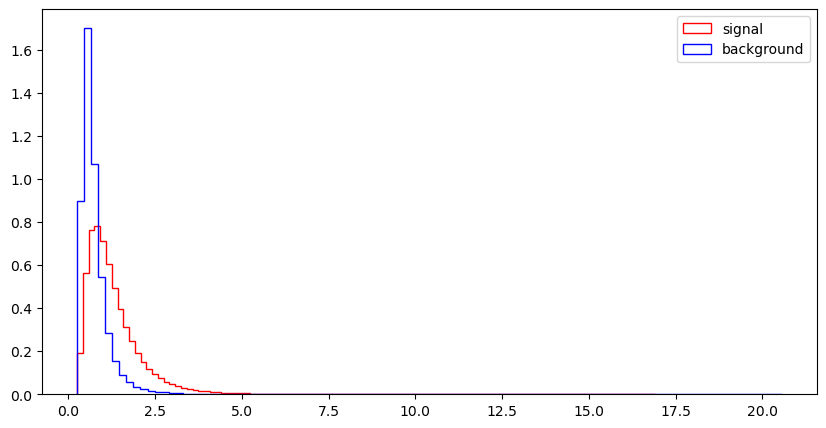

l_1_eta


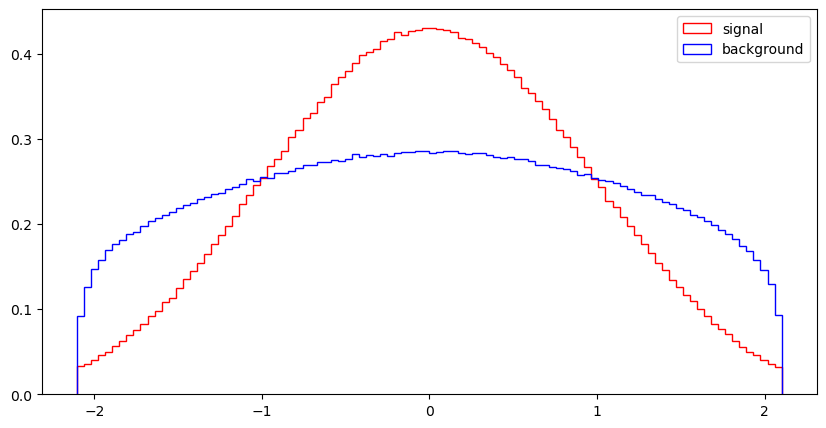

l_1_phi


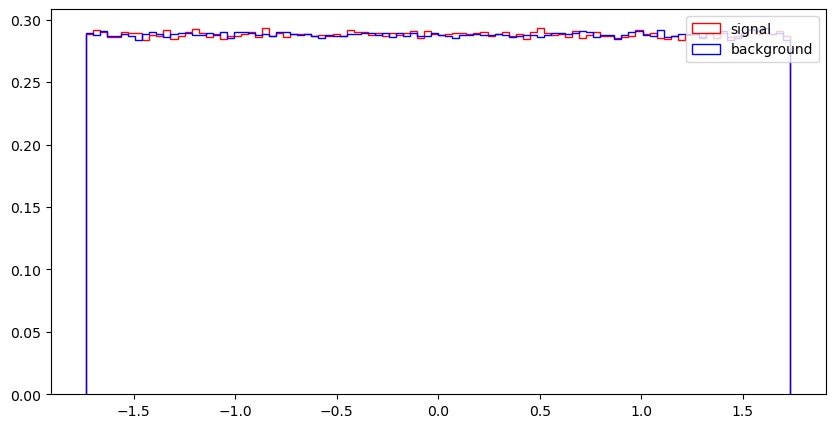

l_2_pT


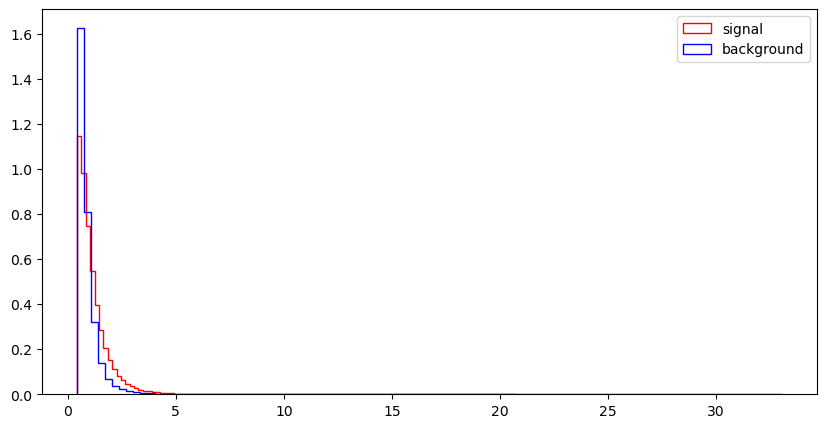

l_2_eta


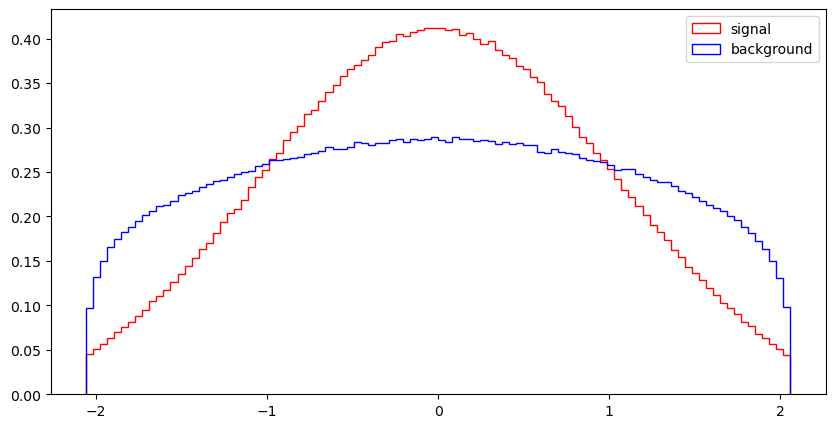

l_2_phi


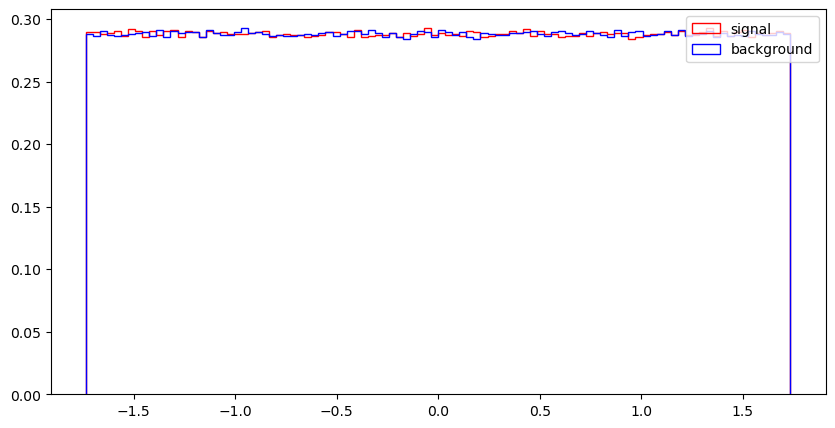

MET


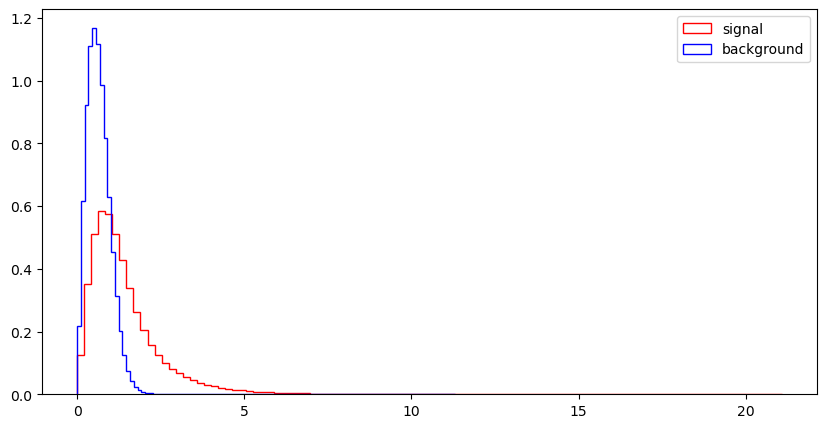

MET_phi


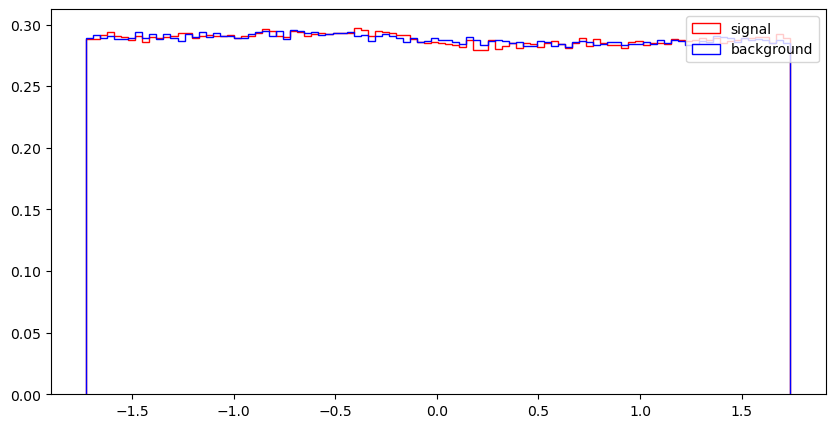

MET_rel


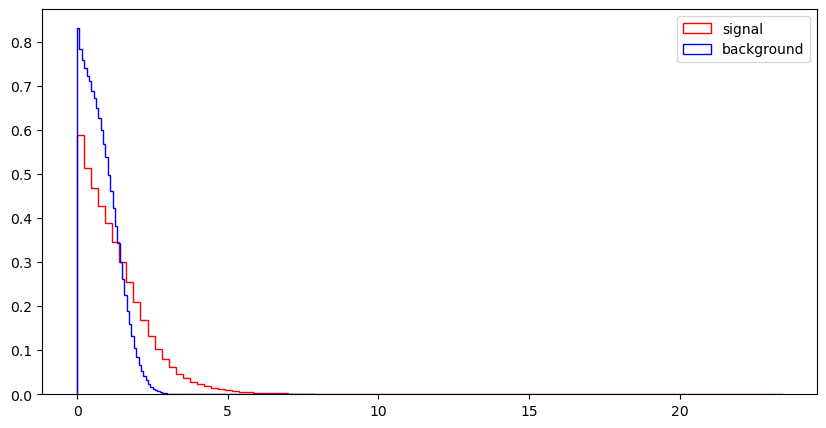

axial_MET


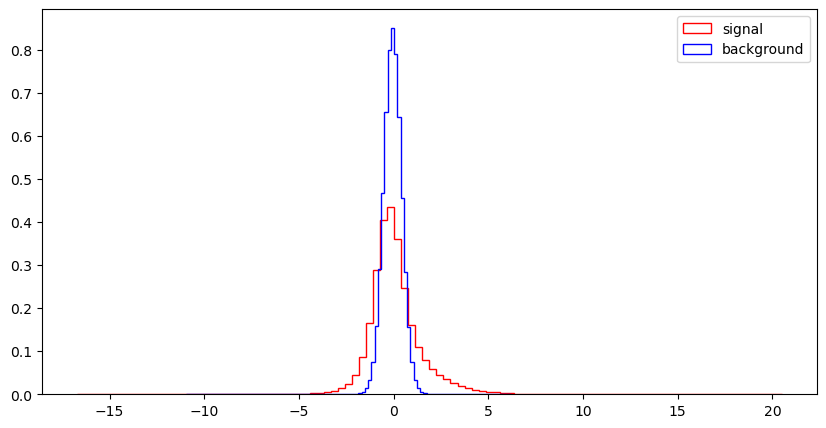

M_R


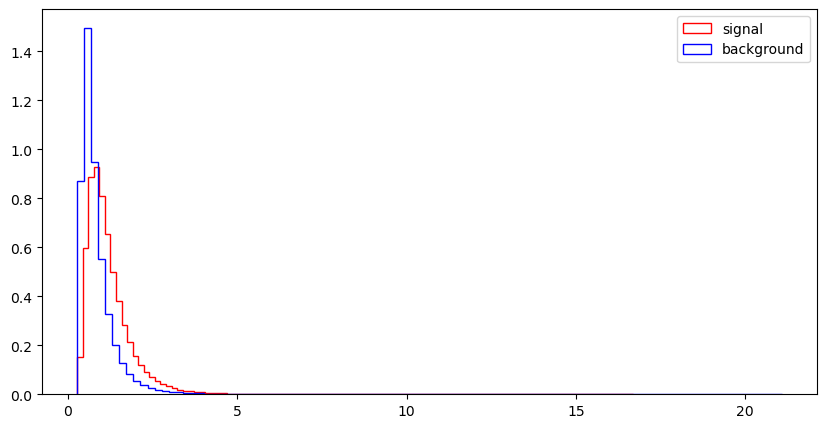

M_TR_2


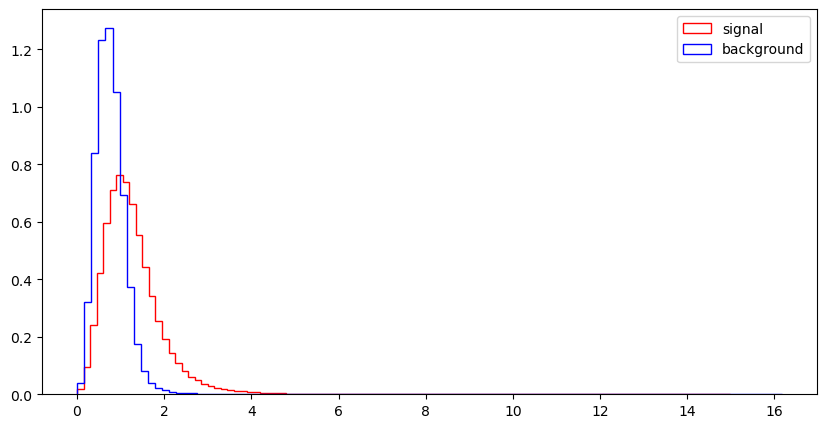

R


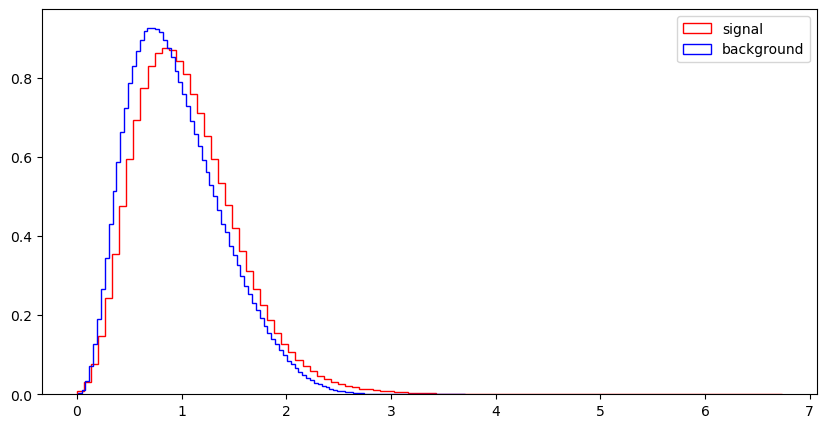

MT2


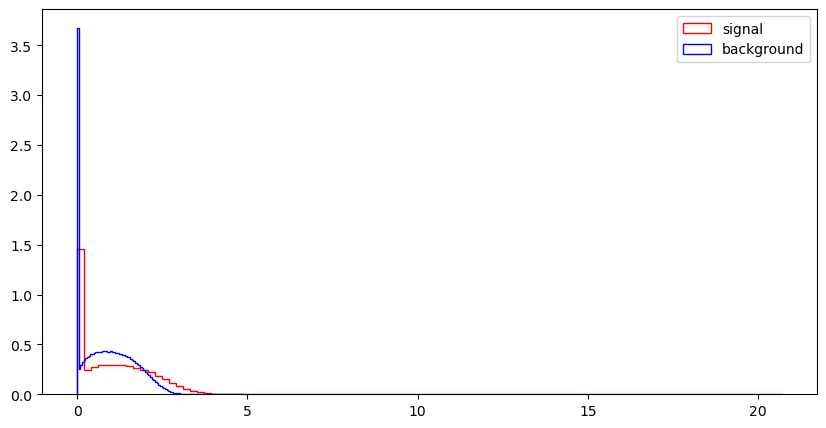

S_R


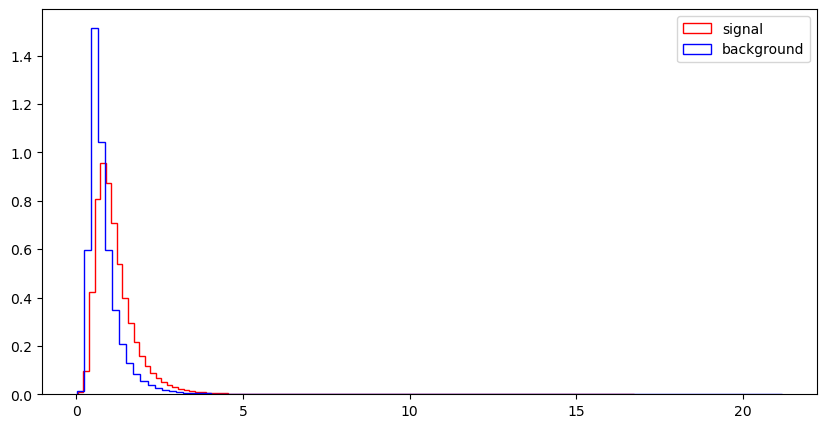

M_Delta_R


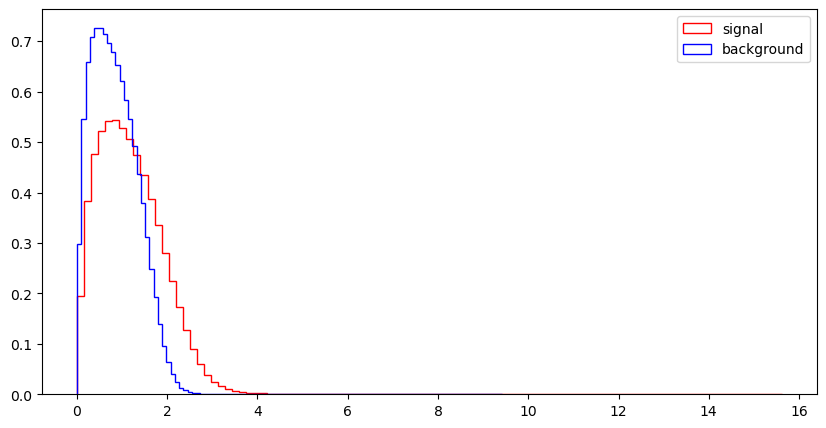

dPhi_r_b


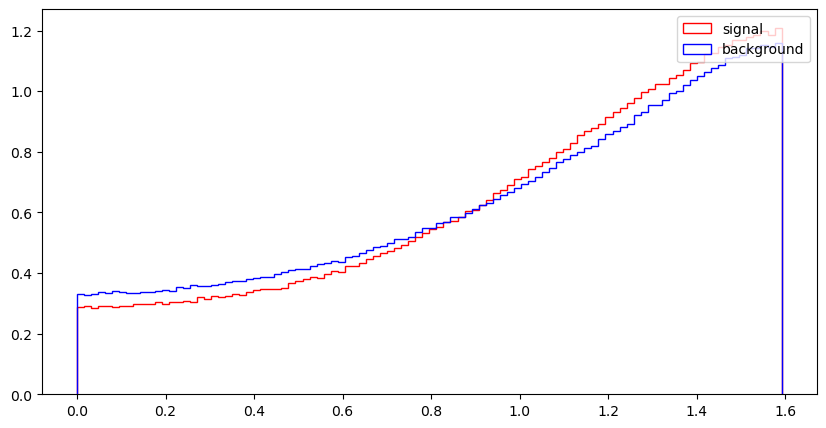

cos_theta_r1


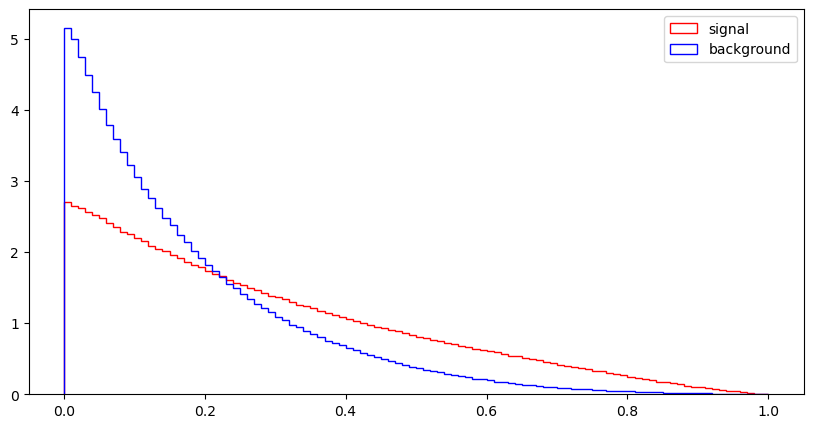

In [102]:
import numpy as np
for var in VarNames[1:]:
    print (var)
    plt.figure(figsize=(10,5))
    plt.hist(np.array(df_sig[var]),bins=100,histtype="step", color="red",label="signal",density=1, stacked=True)
    plt.hist(np.array(df_bkg[var]),bins=100,histtype="step", color="blue", label="background",density=1, stacked=True)
    plt.legend(loc='upper right')
    plt.show()

## Exercise 3: Make nice figures

Now use `matplotlib` to reproduce as closely as you can figures 5 and 6 from the paper. This exercise is intended to get you to familiarize yourself with making nicely formatted `matplotlib` figures with multiple plots. Note that the plots in the paper are actually wrong!

<>:11: SyntaxWarning: invalid escape sequence '\p'
<>:11: SyntaxWarning: invalid escape sequence '\p'
/tmp/ipykernel_481/1235095270.py:11: SyntaxWarning: invalid escape sequence '\p'
  plt.title("Figure 5: Distribution of $l_2^{\phi}$")


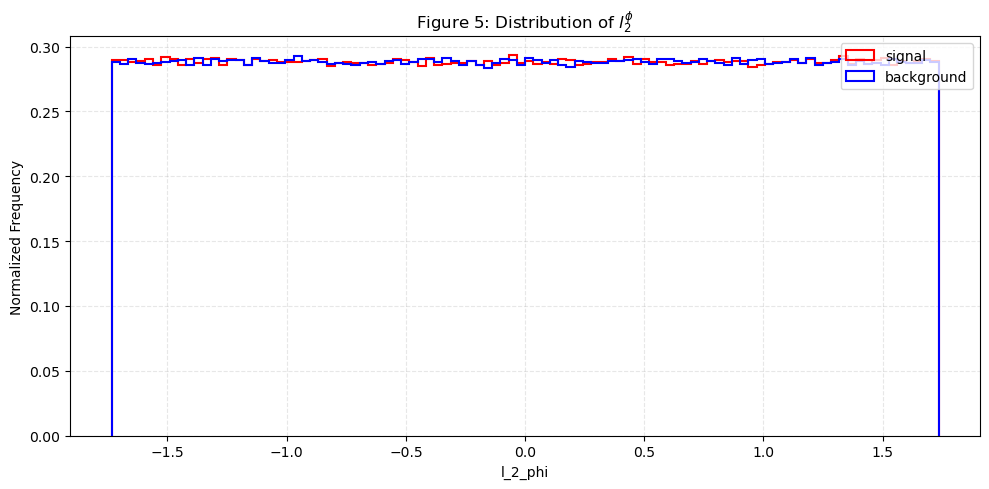

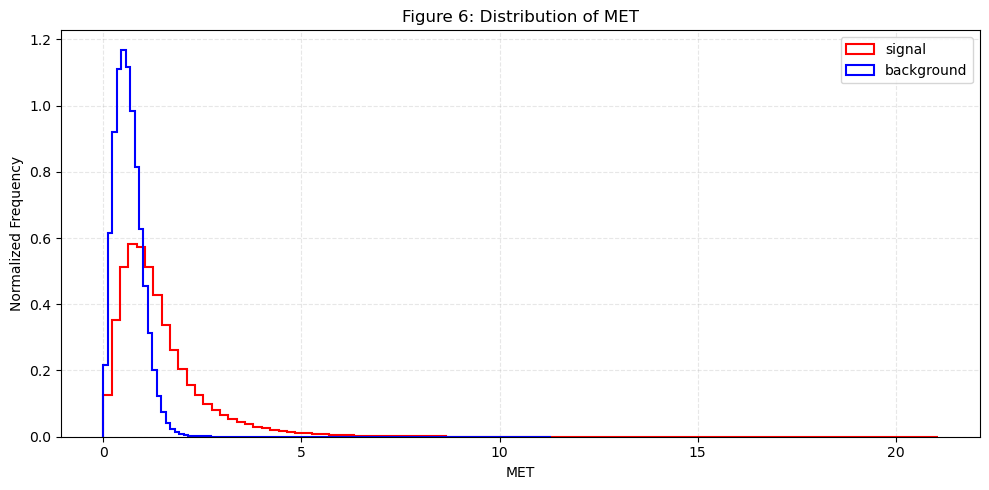

In [103]:
import matplotlib.pyplot as plt

# --- FIGURE 5: Flat Distribution (l_2_phi) ---
plt.figure(figsize=(10, 5))
plt.hist(df_sig['l_2_phi'], bins=100, density=True, histtype='step',
         color='red', linewidth=1.5, label='signal')
plt.hist(df_bkg['l_2_phi'], bins=100, density=True, histtype='step',
         color='blue', linewidth=1.5, label='background')
plt.xlabel("l_2_phi")
plt.ylabel("Normalized Frequency")
plt.title("Figure 5: Distribution of $l_2^{\phi}$")
plt.legend(loc='upper right')
plt.grid(True, linestyle='--', alpha=0.3)
plt.tight_layout()
plt.savefig("figure5_l2phi.png", dpi=300)
plt.show()


# --- FIGURE 6: Peaked Distribution (MET) ---
plt.figure(figsize=(10, 5))
plt.hist(df_sig['MET'], bins=100, density=True, histtype='step',
         color='red', linewidth=1.5, label='signal')
plt.hist(df_bkg['MET'], bins=100, density=True, histtype='step',
         color='blue', linewidth=1.5, label='background')
plt.xlabel("MET")
plt.ylabel("Normalized Frequency")
plt.title("Figure 6: Distribution of MET")
plt.legend(loc='upper right')
plt.grid(True, linestyle='--', alpha=0.3)
plt.tight_layout()
plt.savefig("figure6_MET.png", dpi=300)
plt.show()


## Exercise 4: Correlation

### Exercise 4.1

#### Part a
Write a function that creates pair plots and use it to compare variables in the SUSY sample, separately for low and high-level features. Refer to Lecture 13 for details. Do not use `seaborn`.

#### Part b
Making these plots can be slow because creating each plot initiates a full loop over the data. Make at least one modification to your function in part a to speed it up. Can you propose a different method of creating histograms that would speed up making such pair plots?

#### Part c
Which observables appear to be best for separating signal from background?

In [104]:
 import matplotlib.pyplot as plt

def plot_pairwise(df, feature_list, sample_size=5000):
    # Sample the data
    df_sample = df.sample(n=sample_size, random_state=42)
    df_sig_sample = df_sample[df_sample.signal == 1]
    df_bkg_sample = df_sample[df_sample.signal == 0]

    num_features = len(feature_list)
    fig, axes = plt.subplots(num_features, num_features, figsize=(2*num_features, 2*num_features))

    for i in range(num_features):
        for j in range(num_features):
            ax = axes[i, j]

            if i == j:
                #Diagonal: 1D histogram for both signal and background
                ax.hist(df_sig_sample[feature_list[i]], bins=30, color="blue", alpha=0.5, density=True, label="Signal")
                ax.hist(df_bkg_sample[feature_list[i]], bins=30, color="red", alpha=0.5, density=True, label="Background")
            else:
                #Off-diagonal: scatter plots
                ax.scatter(df_sig_sample[feature_list[j]], df_sig_sample[feature_list[i]],
                           color="blue", alpha=0.3, s=1)
                ax.scatter(df_bkg_sample[feature_list[j]], df_bkg_sample[feature_list[i]],
                           color="red", alpha=0.3, s=1)

            if j == 0:
                ax.set_ylabel(feature_list[i])
            if i == num_features - 1:
                ax.set_xlabel(feature_list[j])

    handles, labels = ax.get_legend_handles_labels()
    fig.legend(handles, labels, loc='upper right', bbox_to_anchor=(1.12, 1))
    plt.tight_layout()
    plt.show()

High level features:


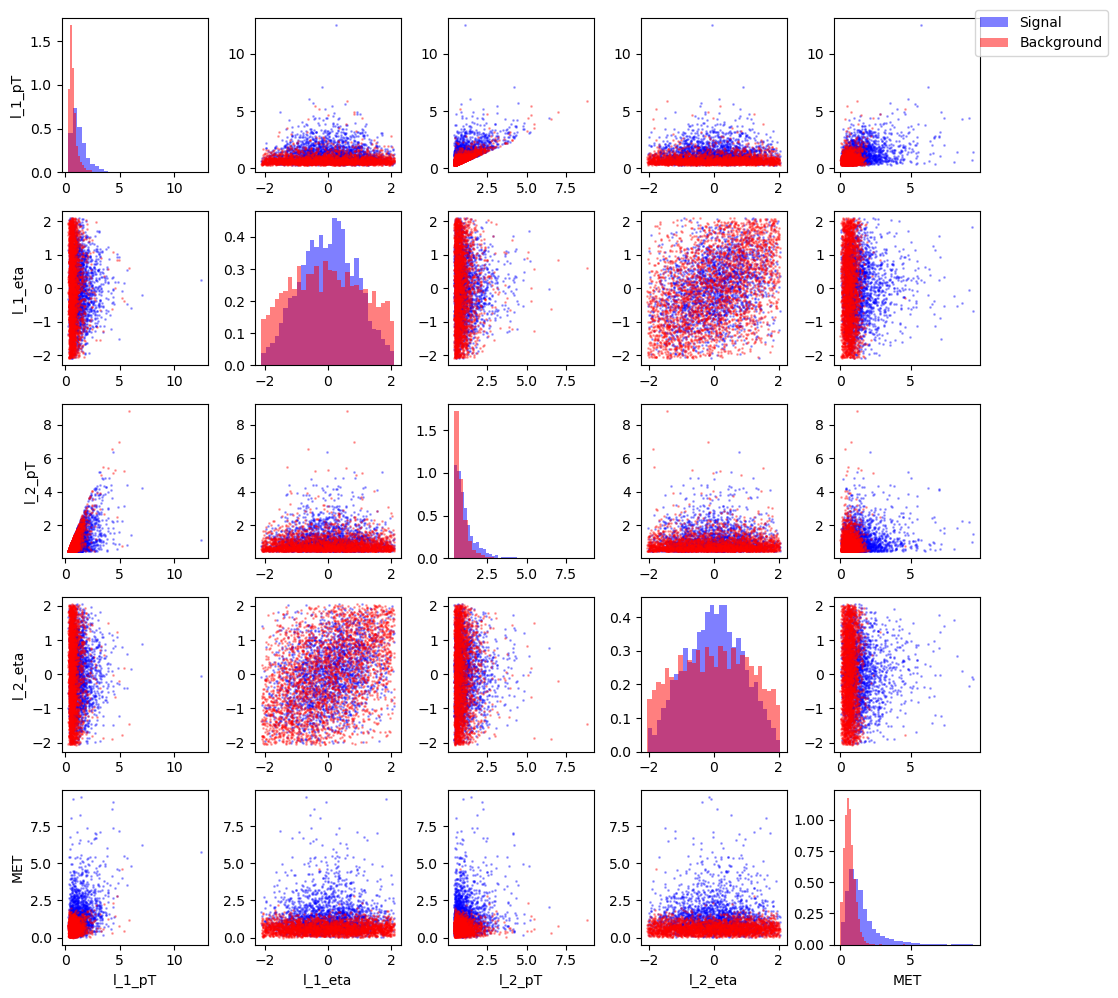

Low level features:


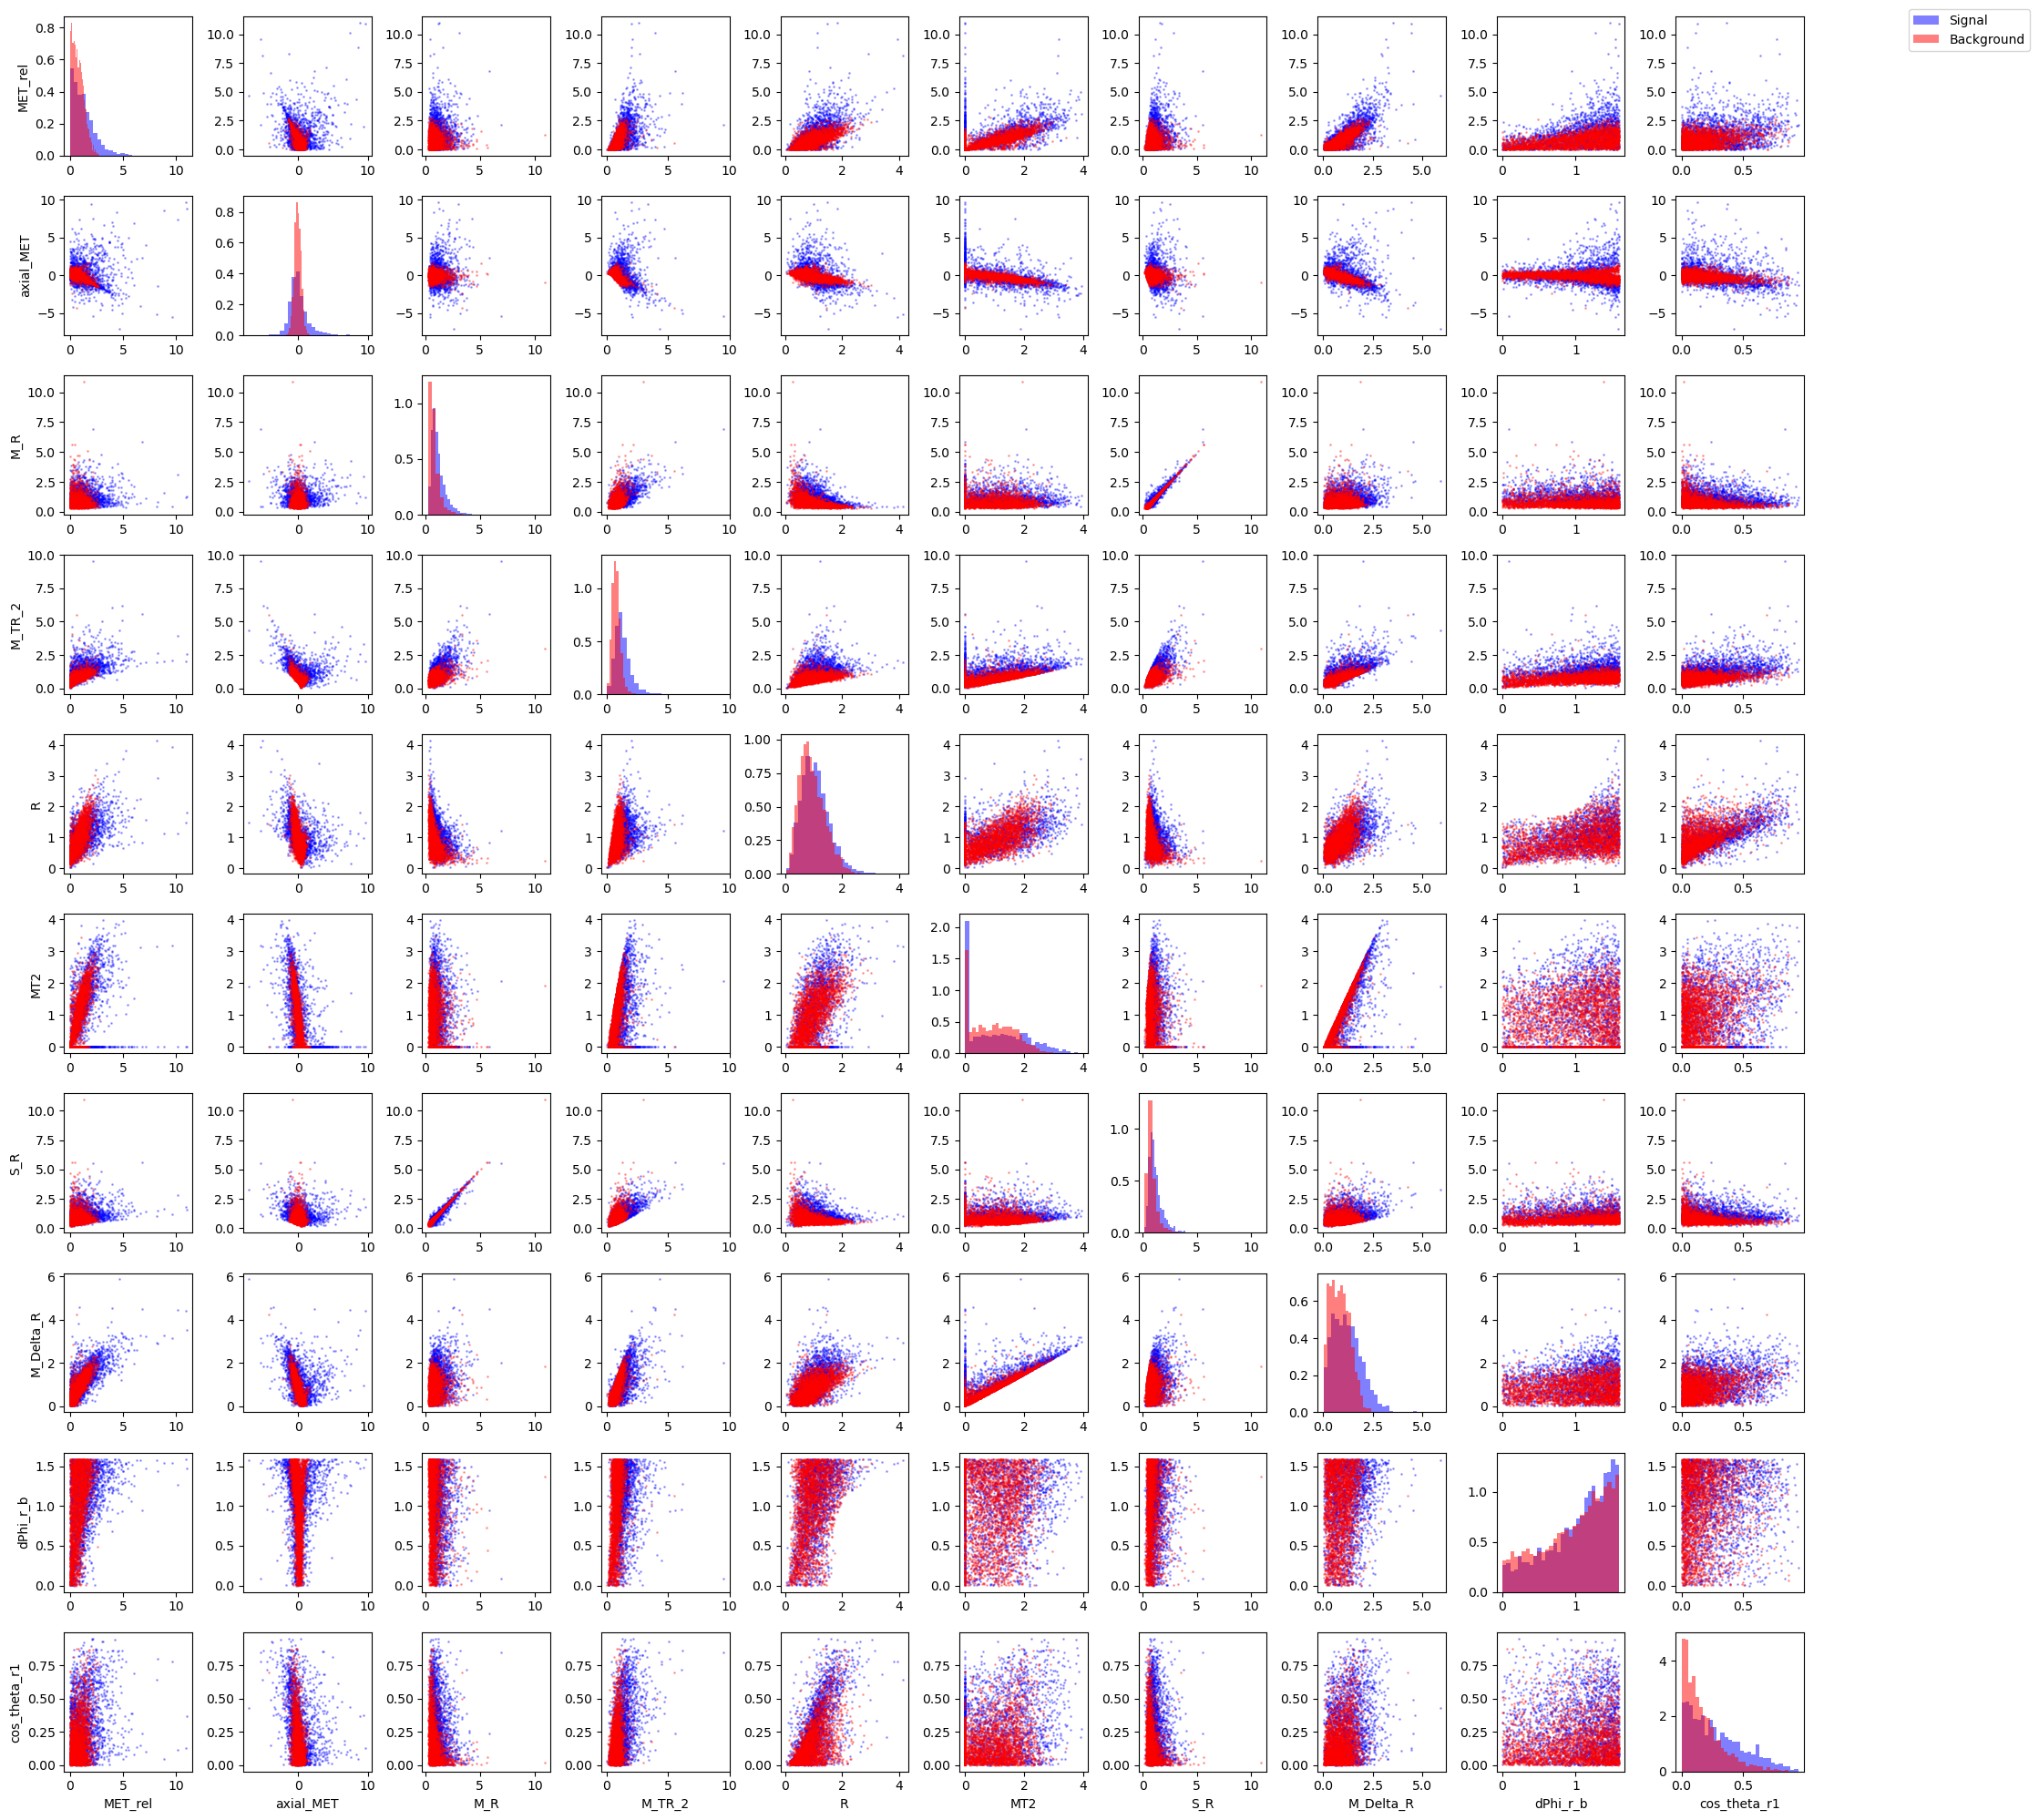

In [105]:
# High-level features
high_feats = ["l_1_pT", "l_1_eta", "l_2_pT", "l_2_eta", "MET"]
print("High level features:")
plot_pairwise(df, high_feats)


# Low-level features
low_feats = ["MET_rel", "axial_MET", "M_R", "M_TR_2", "R",
                 "MT2", "S_R", "M_Delta_R", "dPhi_r_b", "cos_theta_r1"]
print("Low level features:")
plot_pairwise(df, low_feats)


Low-level features scatter:
plotting 10×10 grid on 2000 points


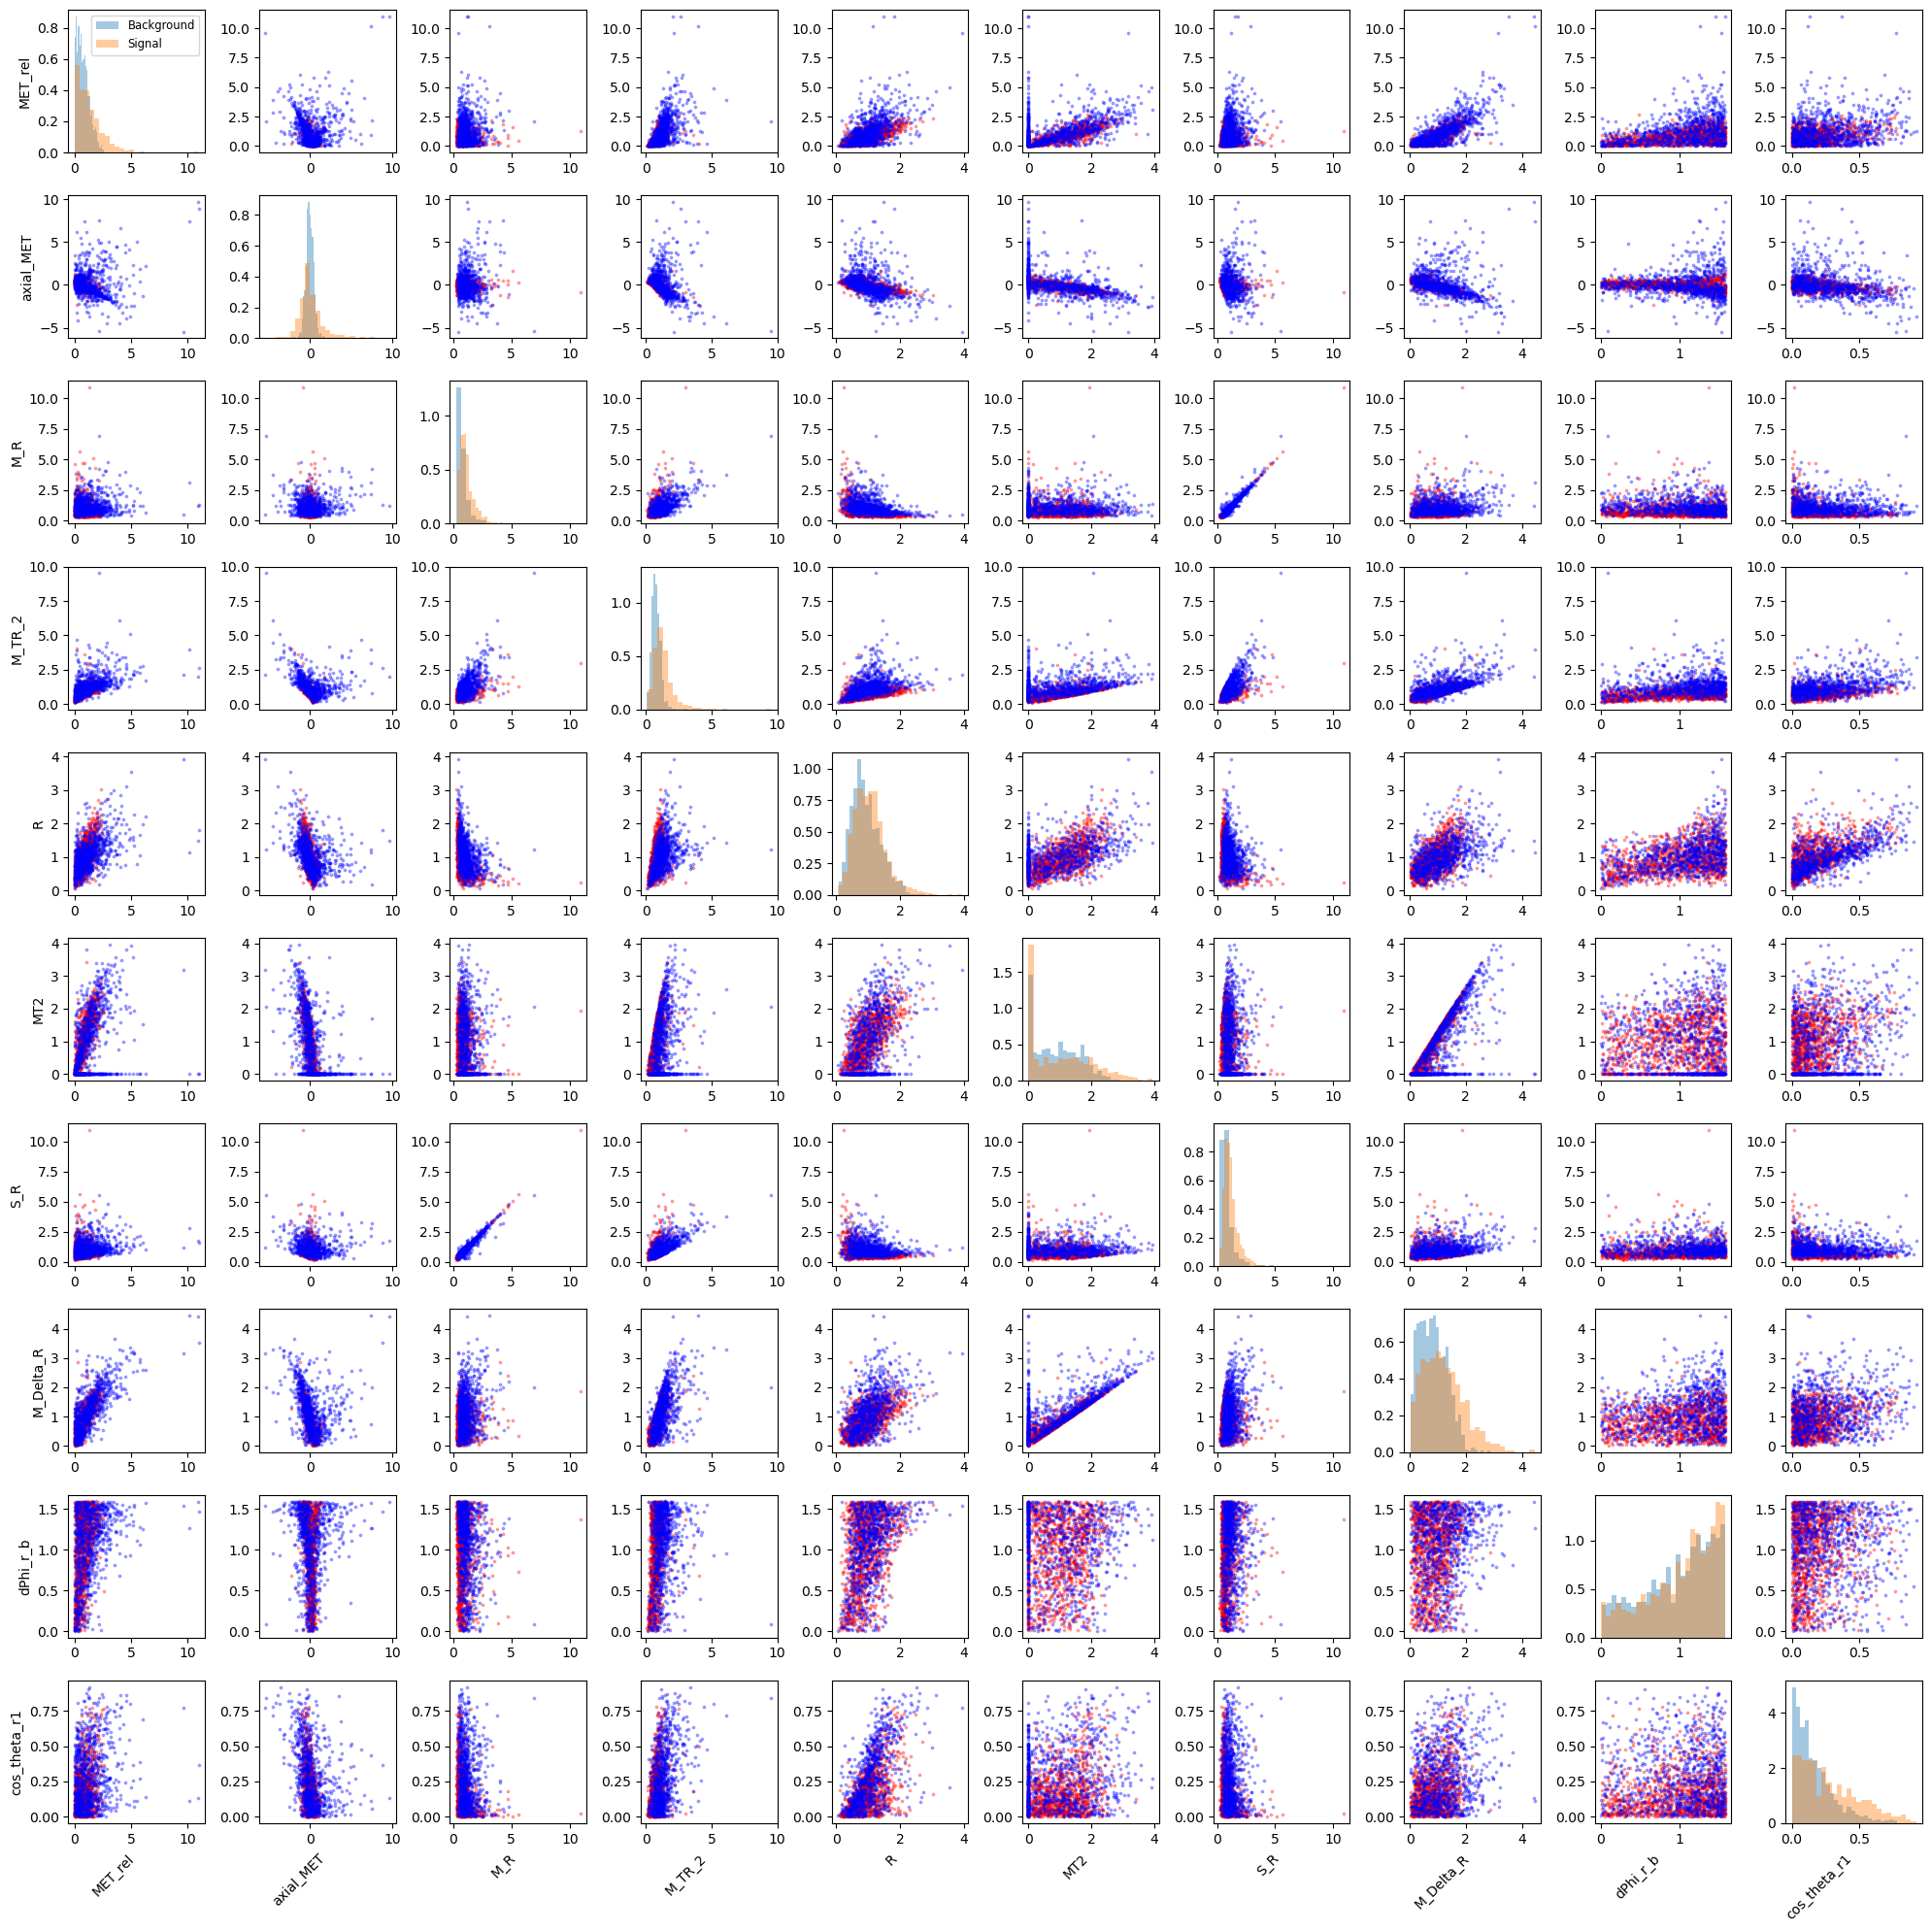

High-level features scatter:
plotting 5×5 grid on 2000 points


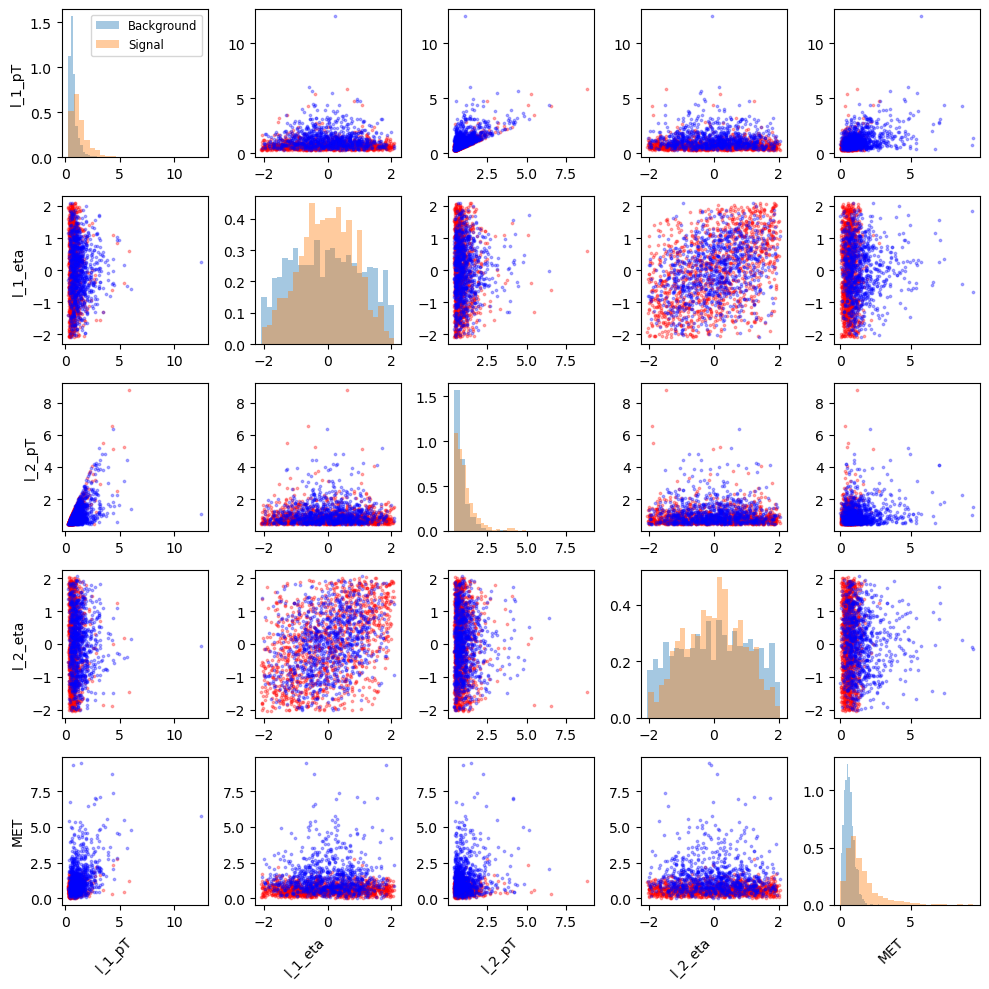

In [106]:
# trying to make it faster



def plot_fast(df, feature_list, sample_size=2000, marker_size=3):
    print(f"plotting {len(feature_list)}×{len(feature_list)} grid on {sample_size} points")
    df_s = df.sample(n=sample_size, random_state=42)
    sig = df_s[df_s.signal == 1]
    bkg = df_s[df_s.signal == 0]

    data_sig = {f: sig[f].values for f in feature_list}
    data_bkg = {f: bkg[f].values for f in feature_list}

    N = len(feature_list)
    fig, axes = plt.subplots(N, N, figsize=(2*N, 2*N), squeeze=False)

    for i, yi in enumerate(feature_list):
        for j, xi in enumerate(feature_list):
            ax = axes[i][j]

            if i == j:
                ax.hist(data_bkg[yi], bins=25, alpha=0.4, density=True, label='Background')
                ax.hist(data_sig[yi], bins=25, alpha=0.4, density=True, label='Signal')
            else:
                ax.scatter(data_bkg[xi], data_bkg[yi],
                           s=marker_size, alpha=0.3, color='red')
                ax.scatter(data_sig[xi], data_sig[yi],
                           s=marker_size, alpha=0.3, color='blue')

            if i == N-1:
                ax.set_xlabel(xi, rotation=45, ha='right')
            if j == 0:
                ax.set_ylabel(yi)
            if i == 0 and j == 0:
                ax.legend(loc='upper right', fontsize='small')

    plt.tight_layout()
    plt.show()
## I think is it faster because it pulls each column out once and uses C-optimized
#binning to draw whole cells instead of Python-looping and scattering every single point 
#but does not seem that much different than the previous one
print("Low-level features scatter:")
plot_fast(df, low_feats)

print("High-level features scatter:")
plot_fast(df, high_feats)


In [ ]:
## Part C
#The engineered “DER_…” variables—especially M_R, M_TR_2, R, and MT2—separate signal from background
#the best (they barely overlap).Of the raw measurements, MET and the leading lepton pₜ (l_1_pT) do the next best job.

### Exercise 4.2

#### Part a
Install [tabulate](https://github.com/astanin/python-tabulate). 

#### Part b
Use numpy to compute the [covariance matrix](https://numpy.org/doc/stable/reference/generated/numpy.cov.html) and [correlation matrix](https://numpy.org/doc/stable/reference/generated/numpy.corrcoef.html) between all observabes, and separately between low and high-level features.

#### Part c
Use tabulate to create a well formatted table of the covariance and correlation matrices, with nice headings and appropriate significant figures. Embed the table into this notebook.

#### Part d
Write a function that takes a dataset and appropriate arguments and performs steps b and c.  

In [109]:
import tabulate

Hint: Example code for embedding a `tabulate` table into a notebook:

In [113]:
from IPython.display import HTML, display
import tabulate
table = [["A",1,2],
        ["C",3,4],
        ["D",5,6]]
display(HTML(tabulate.tabulate(table, tablefmt='html', headers=["X","Y","Z"])))

In [115]:
all_feats      = RawNames + FeatureNames
low_feats      = RawNames
high_feats     = FeatureNames

# covariance (columns as variables)
cov_all  = np.cov( df[all_feats].values,   rowvar=False )
cov_low  = np.cov( df[low_feats].values,   rowvar=False )
cov_high = np.cov( df[high_feats].values,  rowvar=False )

# correlation
corr_all  = np.corrcoef( df[all_feats].values,  rowvar=False )
corr_low  = np.corrcoef( df[low_feats].values,  rowvar=False )
corr_high = np.corrcoef( df[high_feats].values, rowvar=False )

In [116]:
# Part c) Tabulate & embed into notebook
from tabulate import tabulate
from IPython.display import HTML, display

def show_matrix(mat, cols, title, floatfmt=".3f"):
    #Render a square matrix `mat` with column/row labels `cols` as HTML.
    headers = [""] + cols
    table = []
    for name, row in zip(cols, mat):
        table.append([name] + [f"{v:{floatfmt}}" for v in row])
    html = tabulate(table, headers=headers, tablefmt="html")
    display(HTML(f"<h4>{title}</h4>" + html))

# show covariance tables
show_matrix(cov_all,  all_feats,  "Covariance: All Features")
show_matrix(cov_low,  low_feats,  "Covariance: Low-Level Features")
show_matrix(cov_high, high_feats, "Covariance: High-Level Features")

# show correlation tables
show_matrix(corr_all,  all_feats,  "Correlation: All Features")
show_matrix(corr_low,  low_feats,  "Correlation: Low-Level Features")
show_matrix(corr_high, high_feats, "Correlation: High-Level Features")


In [117]:
#  d) Wrap b & c in a function
import numpy as np
from tabulate import tabulate
from IPython.display import HTML, display

def compute_and_show_cov_corr(df, low_feats, high_feats, floatfmt=".3f"):
    #computes and displays HTML tables of covariance and correlation matrices for:
      #1) all features (low_feats + high_feats),
      #2) low-level features only,
      #3) high-level features only.
    
    all_feats = list(low_feats) + list(high_feats)
    # compute matrices
    cov_all   = np.cov( df[all_feats].values,  rowvar=False )
    cov_low   = np.cov( df[low_feats].values,  rowvar=False )
    cov_high  = np.cov( df[high_feats].values, rowvar=False )
    corr_all  = np.corrcoef( df[all_feats].values,  rowvar=False )
    corr_low  = np.corrcoef( df[low_feats].values,  rowvar=False )
    corr_high = np.corrcoef( df[high_feats].values, rowvar=False )

    def show_matrix(mat, cols, title):
        headers = [""] + cols
        table = []
        for name, row in zip(cols, mat):
            table.append([name] + [f"{v:{floatfmt}}" for v in row])
        html = tabulate(table, headers=headers, tablefmt="html")
        display(HTML(f"<h4>{title}</h4>" + html))

    # display
    show_matrix(cov_all,  all_feats,  "Covariance: All Features")
    show_matrix(cov_low,  low_feats,  "Covariance: Low-Level Features")
    show_matrix(cov_high, high_feats, "Covariance: High-Level Features")
    show_matrix(corr_all,  all_feats,  "Correlation: All Features")
    show_matrix(corr_low,  low_feats,  "Correlation: Low-Level Features")
    show_matrix(corr_high, high_feats, "Correlation: High-Level Features")


In [118]:
compute_and_show_cov_corr(df, RawNames, FeatureNames, floatfmt=".2f")


## Exercise 5: Selection

### Exercise 5.1

Part a
By looking at the signal/background distributions for each observable (e.g. $x$) determine which selection criteria would be optimal: 

1. $x > x_c$
2. $x < x_c$
3. $|x - \mu| > x_c$
4. $|x - \mu| < x_c$

where $x_c$ is value to be determined below.

### Exercise 5.2

Plot the True Positive Rate (TPR) (aka signal efficiency $\epsilon_S(x_c)$) and False Positive Rate (FPR) (aka background efficiency $\epsilon_B(x_c)$) as function of $x_c$ for applying the strategy in part a to each observable. 

### Exercise 5.3
Assume 3 different scenarios corresponding to different numbers of signal and background events expected in data:

1. Expect $N_S=10$, $N_B=100$.
1. Expect $N_S=100$, $N_B=1000$.
1. Expect $N_S=1000$, $N_B=10000$.
1. Expect $N_S=10000$, $N_B=100000$.

Plot the significance ($\sigma_{S'}$) for each observable as function of $x_c$ for each scenario, where 

$\sigma_{S'}= \frac{N'_S}{\sqrt{N'_S+N'_B}}$

and $N'_{S,B} = \epsilon_{S,B}(x_c) * N_{S,B}$.

In [119]:
# 5.0: Rank all features by AUC and selecting top 3

from sklearn.metrics import roc_curve, auc

# Computing AUC for each feature in FeatureNames
auc_scores = {}
for var in FeatureNames:
    sig_vals = df_sig[var].values
    bkg_vals = df_bkg[var].values
    y_true  = np.concatenate([np.ones_like(sig_vals),  np.zeros_like(bkg_vals)])
    y_score = np.concatenate([sig_vals,           bkg_vals])
    fpr, tpr, _ = roc_curve(y_true, y_score)
    auc_scores[var] = auc(fpr, tpr)

# Sorting and display
sorted_auc = sorted(auc_scores.items(), key=lambda x: x[1], reverse=True)
print("Features sorted by AUC:")
for var, score in sorted_auc:
    print(f"  {var:12s} : {score:.3f}")

#  top 3
top_vars = [var for var, _ in sorted_auc[:3]]
print("\nTop 3 variables:", top_vars)


Features sorted by AUC:
  M_TR_2       : 0.757
  M_R          : 0.702
  S_R          : 0.698
  cos_theta_r1 : 0.646
  M_Delta_R    : 0.641
  MET_rel      : 0.630
  R            : 0.562
  MT2          : 0.517
  dPhi_r_b     : 0.517
  axial_MET    : 0.498

Top 3 variables: ['M_TR_2', 'M_R', 'S_R']


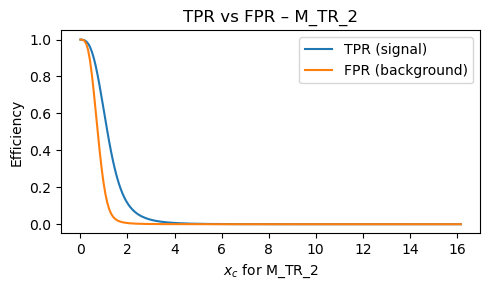

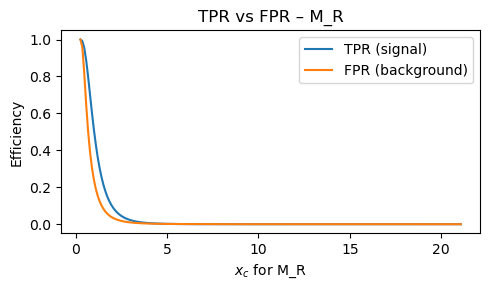

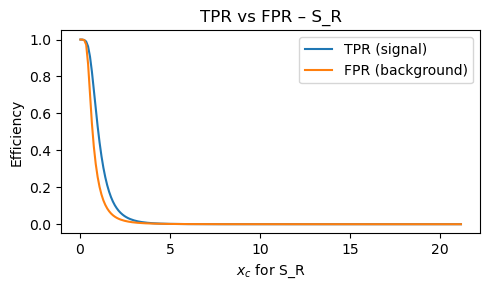

/tmp/ipykernel_481/3674481647.py:50: RuntimeWarning: invalid value encountered in divide
  sigma = (tpr * N_S) / np.sqrt(tpr * N_S + fpr * N_B)


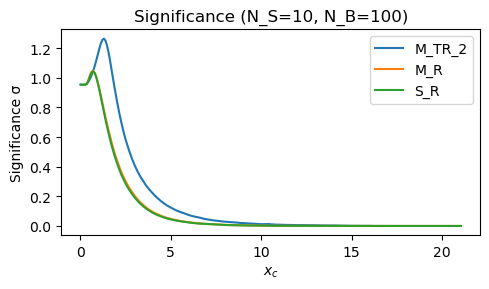

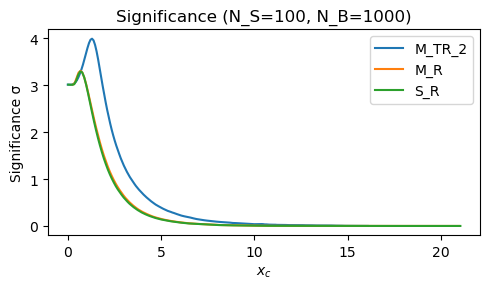

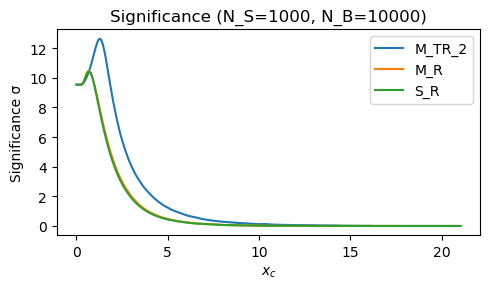

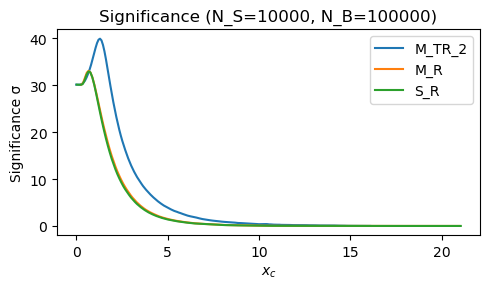

In [121]:

# TPR/FPR sweep & significance curves


def compute_efficiencies(sig_vals, bkg_vals, num_points=200):
    
    #Sweep threshold xc from min to max of all values,returning arrays (xc, TPR, FPR).
    
    low  = min(sig_vals.min(), bkg_vals.min())
    high = max(sig_vals.max(), bkg_vals.max())
    xc   = np.linspace(low, high, num_points)
    tpr  = [(sig_vals > thr).mean() for thr in xc]
    fpr  = [(bkg_vals > thr).mean() for thr in xc]
    return xc, np.array(tpr), np.array(fpr)

def plot_tpr_fpr(xc, tpr, fpr, var_name):
    plt.figure(figsize=(5,3))
    plt.plot(xc, tpr, label='TPR (signal)')
    plt.plot(xc, fpr, label='FPR (background)')
    plt.xlabel(f'$x_c$ for {var_name}')
    plt.ylabel('Efficiency')
    plt.title(f'TPR vs FPR – {var_name}')
    plt.legend()
    plt.tight_layout()
    plt.show()


# 5.2: Looping over your top 3 variables and plot TPR/FPR —
for var in top_vars:
    sig_vals = df_sig[var].values
    bkg_vals = df_bkg[var].values
    xc, tpr, fpr = compute_efficiencies(sig_vals, bkg_vals, num_points=200)
    plot_tpr_fpr(xc, tpr, fpr, var)

# — 5.3: Significance curves for four (N_S,N_B) scenarios 
scenarios = [(10,100), (100,1000), (1000,10000), (10000,100000)]
for (N_S, N_B) in scenarios:
    plt.figure(figsize=(5,3))
    for var in top_vars:
        sig_vals = df_sig[var].values
        bkg_vals = df_bkg[var].values
        xc, tpr, fpr = compute_efficiencies(sig_vals, bkg_vals, num_points=200)
        sigma = (tpr * N_S) / np.sqrt(tpr * N_S + fpr * N_B)
        plt.plot(xc, sigma, label=var)
    plt.xlabel('$x_c$')
    plt.ylabel('Significance σ')
    plt.title(f'Significance (N_S={N_S}, N_B={N_B})')
    plt.legend()
    plt.tight_layout()
    plt.show()


## Exercise 6: Cut Flow


### Exercise 6.1

For each above scenario, choose a subset (minumum 3) of observables to use for selections, and values of $x_c$ based on your significance plots (part 3c). 

### Exercise 6.2
Create a "cut-flow" table for each scenario where you successively make the selections on each observable and tabulate $\epsilon_S$, $\epsilon_B$, $N'_S$, $N'_B$, and $\sigma_{S'}$.

### Exercise 6.3
In 3c above you computed the significance for each observable assuming to make no other selections on any other observable. If the variables are correlated, then this assumption can lead to non-optimial results when selecting on multiple variables. By looking at the correlation matrices and your answers to 4b, identify where this effect could be most detrimental to the significance. Attempt to correct the issue by applying the selection in one observable and then optimizing (part 3c) for a second observable. What happens if you change the order of your selection (make selection on second and optimize on first)?




In [122]:
# 6.1: for each scenario, recording the 3 cuts that gave max σ
scenarios = [(10,100),(100,1000),(1000,10000),(10000,100000)]
best_cuts = {}  # will hold { scenario: (var,op,xc)

for N_S, N_B in scenarios:
    cuts = []
    for var in top_vars:
        sig = df_sig[var].values
        bkg = df_bkg[var].values
        xc, tpr, fpr = compute_efficiencies(sig, bkg, num_points=200)
        sigma = (tpr * N_S) / np.sqrt(tpr * N_S + fpr * N_B)
        idx = np.argmax(sigma)
        cuts.append((var, '>', float(xc[idx])))
    best_cuts[(N_S, N_B)] = cuts

# show
for scen, cuts in best_cuts.items():
    print(f"Scenario N_S={scen[0]},N_B={scen[1]} cuts:")
    for var,op,thr in cuts:
        print(f"  {var} {op} {thr:.3f}")
    print()


/tmp/ipykernel_481/3313592813.py:11: RuntimeWarning: invalid value encountered in divide
  sigma = (tpr * N_S) / np.sqrt(tpr * N_S + fpr * N_B)


Scenario N_S=10,N_B=100 cuts:
  M_TR_2 > 16.167
  M_R > 21.076
  S_R > 21.152

Scenario N_S=100,N_B=1000 cuts:
  M_TR_2 > 16.167
  M_R > 21.076
  S_R > 21.152

Scenario N_S=1000,N_B=10000 cuts:
  M_TR_2 > 16.167
  M_R > 21.076
  S_R > 21.152

Scenario N_S=10000,N_B=100000 cuts:
  M_TR_2 > 16.167
  M_R > 21.076
  S_R > 21.152



In [123]:

def make_cutflow(df, df_sig, df_bkg, cuts):
    N_S0, N_B0 = len(df_sig), len(df_bkg)
    df_cut = df.copy()
    rows = []
    for var, op, thr in cuts:
        if op == '>':
            df_cut = df_cut[df_cut[var] > thr]
        elif op == '<':
            df_cut = df_cut[df_cut[var] < thr]
        else:
            mu = df[var].mean()
            df_cut = df_cut[np.abs(df_cut[var]-mu) > thr]

        eps_S = (df_cut.signal==1).mean()
        eps_B = (df_cut.signal==0).mean()
        Np_S  = eps_S * N_S0
        Np_B  = eps_B * N_B0
        sigma = Np_S / np.sqrt(Np_S + Np_B)

        rows.append({
            'cut':    f'{var} {op} {thr:.3f}',
            'ε_S':    eps_S,
            'ε_B':    eps_B,
            "N'_S":   Np_S,
            "N'_B":   Np_B,
            'σ':      sigma
        })
    return pd.DataFrame(rows)

# generate and display for each scenario
for scen, cuts in best_cuts.items():
    print(f"\nCutflow for N_S={scen[0]}, N_B={scen[1]}:\n")
    cf = make_cutflow(df, df_sig, df_bkg, cuts)
    display(cf)  



Cutflow for N_S=10, N_B=100:



cut  ε_S  ε_B  N'_S  N'_B   σ
0  M_TR_2 > 16.167  NaN  NaN   NaN   NaN NaN
1     M_R > 21.076  NaN  NaN   NaN   NaN NaN
2     S_R > 21.152  NaN  NaN   NaN   NaN NaN


Cutflow for N_S=100, N_B=1000:



cut  ε_S  ε_B  N'_S  N'_B   σ
0  M_TR_2 > 16.167  NaN  NaN   NaN   NaN NaN
1     M_R > 21.076  NaN  NaN   NaN   NaN NaN
2     S_R > 21.152  NaN  NaN   NaN   NaN NaN


Cutflow for N_S=1000, N_B=10000:



cut  ε_S  ε_B  N'_S  N'_B   σ
0  M_TR_2 > 16.167  NaN  NaN   NaN   NaN NaN
1     M_R > 21.076  NaN  NaN   NaN   NaN NaN
2     S_R > 21.152  NaN  NaN   NaN   NaN NaN


Cutflow for N_S=10000, N_B=100000:



cut  ε_S  ε_B  N'_S  N'_B   σ
0  M_TR_2 > 16.167  NaN  NaN   NaN   NaN NaN
1     M_R > 21.076  NaN  NaN   NaN   NaN NaN
2     S_R > 21.152  NaN  NaN   NaN   NaN NaN

In [124]:
corr = df[top_vars].corr()
print("Correlation matrix:\n", corr)


Correlation matrix:
           M_TR_2       M_R       S_R
M_TR_2  1.000000  0.577579  0.635598
M_R     0.577579  1.000000  0.981360
S_R     0.635598  0.981360  1.000000


In [125]:
cuts = best_cuts[(N_S, N_B)]
thr_map = { var: thr for var, op, thr in cuts }

thrA = thr_map[varA]
thrB = thr_map[varB]

print(f"thr for {varA}: {thrA:.3f}")
print(f"thr for {varB}: {thrB:.3f}")


thr for M_R: 21.076
thr for M_TR_2: 16.167


## Exercise 7: ROC Curves

### Exercise 7.1
For the top 3 observables you identified earlier, create one figure overlaying the Reciever Operating Characteristic (ROC) curves for the 3 observables. Compute the area under the curves and report it in the legend of the figure.

### Exercise 7.2
Write a function that you can use to quickly create the figure in part a with other observables and different conditions. Note that you will likely revise this function as you do the remainder of the lab.

### Exercise 7.3
Use the function from part b to compare the ROC curves for the successive selections in lab 3, exercise 4. Specifically, plot the ROC curve after each selection.

### Exercise 7.4
Use your function and appropriate example to demonstrate the effect (if any) of changing order of the successive selections.



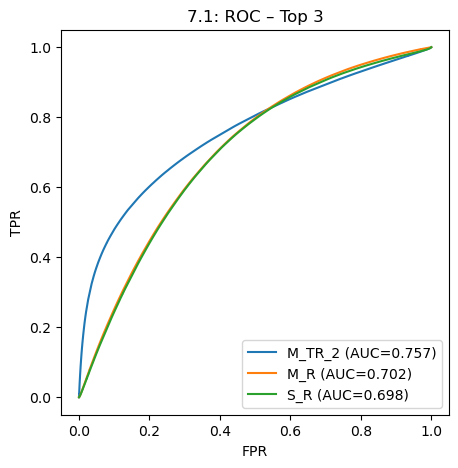

In [65]:
#7.2
def plot_roc(sig_vals, bkg_vals, ax, label):
    if len(sig_vals)==0 or len(bkg_vals)==0:
        print(f"  skipping {label}: no events in one class")
        return None
    y_true  = np.concatenate([np.ones_like(sig_vals),  np.zeros_like(bkg_vals)])
    y_score = np.concatenate([sig_vals,           bkg_vals])
    fpr, tpr, _ = roc_curve(y_true, y_score, pos_label=1)
    roc_auc = auc(fpr, tpr)
    ax.plot(fpr, tpr, label=f'{label} (AUC={roc_auc:.3f})')
    return roc_auc

# 7.1: Top 3 ROC
fig, ax = plt.subplots(figsize=(5,5))
for var in top_vars:
    plot_roc(df_sig[var].values, df_bkg[var].values, ax, var)
ax.set_title('7.1: ROC – Top 3')
ax.set_xlabel('FPR'); ax.set_ylabel('TPR'); ax.legend(loc='lower right')
plt.show()



In [ ]:
# Was not able to do 7.3 and 7.4 due to some error i could not fix

## Exercise 8: Linear Discriminant

### Exercise 8.1

Using numpy, compute the between-class $\bf{S}_B$ and within-class $\bf{S}_W$ covariance matrices defined as:

$$
\bf{S}_B = (\bf{m_2}-\bf{m_1})(\bf{m_2}-\bf{m_1})^T \\
$$
$$
\bf{S}_W = \sum_{i=1,2} \sum_{n=1}^{l_i} (\bf{x}_n^i - \bf{m}_i) (\bf{x}_n^i - \bf{m}_i)^T
$$

where $\bf{m_i}$ are the vectors containing the means for category 1 and 2, here defined as signal and background. Here $\bf{x}_n^i$ is the vector containing the observables for the $n$th example event in category $i$.

### Exercise 8.1

Compute the linear coefficients $\bf{w} = \bf{S_W}^{-1}(\bf{m_2}-\bf{m_1})$. Compare the histogram of the distribution of $F_n^i=\bf{w}^T\bf{x}_n^i$ for the two categories.

### Exercise 8.1

Draw the ROC curve for $F_n$. 

### Exercise 8.1

What is the maximal significance you can obtain in the scenarios in exercise 5? 

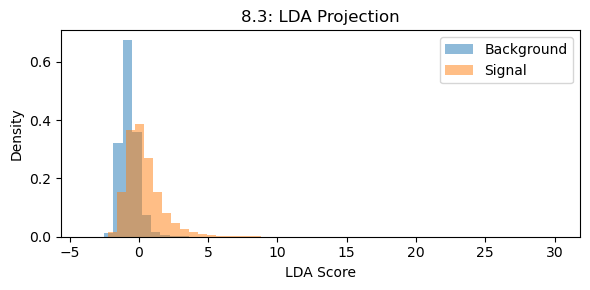

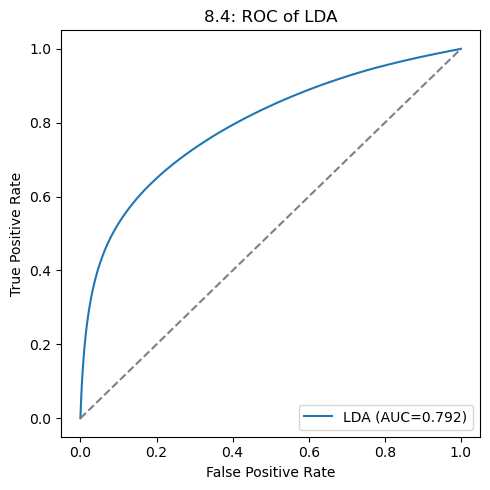

8.5: Max σ = nan at threshold = 30.136


/tmp/ipykernel_481/1668296239.py:45: RuntimeWarning: invalid value encountered in divide
  sigma = (tpr * NS) / np.sqrt(tpr * NS + fpr * NB)


In [132]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

# 1  Ex 5’s top three
features = ['M_TR_2', 'M_R', 'S_R']   

# 2 Extract X and y
X = df[features].values
y = df['signal'].values           

# 3 Fitting LDA with built-in shrinkage
lda = LDA(solver='lsqr', shrinkage='auto')
lda.fit(X, y)

# 4 Compute 1D LDA score
scores = lda.decision_function(X)

# 5 Ploting projected histograms (8.3)
sig_scores = scores[y == 1]
bkg_scores = scores[y == 0]

plt.figure(figsize=(6,3))
plt.hist(bkg_scores, bins=50, alpha=0.5, density=True, label='Background')
plt.hist(sig_scores, bins=50, alpha=0.5, density=True, label='Signal')
plt.title('8.3: LDA Projection')
plt.xlabel('LDA Score'); plt.ylabel('Density')
plt.legend(); plt.tight_layout(); plt.show()

# 6 ROC & AUC (8.4)
fpr, tpr, _ = roc_curve(y, scores, pos_label=1)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(5,5))
plt.plot(fpr, tpr, label=f'LDA (AUC={roc_auc:.3f})')
plt.plot([0,1],[0,1],'--', color='gray')
plt.title('8.4: ROC of LDA')
plt.xlabel('False Positive Rate'); plt.ylabel('True Positive Rate')
plt.legend(loc='lower right'); plt.tight_layout(); plt.show()

# 7 Maximum significance (8.5)
def compute_significance(sig_vals, bkg_vals, NS, NB, n=200):
    lo, hi = min(sig_vals.min(), bkg_vals.min()), max(sig_vals.max(), bkg_vals.max())
    thr = np.linspace(lo, hi, n)
    tpr = np.array([(sig_vals > t).mean() for t in thr])
    fpr = np.array([(bkg_vals > t).mean() for t in thr])
    sigma = (tpr * NS) / np.sqrt(tpr * NS + fpr * NB)
    return thr, sigma

NS, NB = 100, 1000
thr, sigma = compute_significance(sig_scores, bkg_scores, NS, NB)
best_idx = np.argmax(sigma)
print(f"8.5: Max σ = {sigma[best_idx]:.3f} at threshold = {thr[best_idx]:.3f}")
